# Code session 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy as sy

## Determinação de raízes

## `newton`

A função `newton` localiza a raiz de uma função dentro de um intervalo dado usando o método de Newton. 
Os argumentos de entrada obrigatórios desta função são: 

1. a função-alvo `f` (contínua)
2. a estimativa inicial `x0`

Parâmetros opcionais relevantes são: 

- `fprime`: a derivada da função, quando disponível. Caso ela não seja especificada, o _método da secante_ é usado. 
- `fprime2`: a segunda derivada da função, quando disponível. Se ela for especificada, o _método de Halley_ é usado. 
- `tol`: tolerância (padrão: 1.48e-08)
- `maxiter`: número máximo de iterações (padrão: 50)
- `disp`: mostra erro se algoritmo não convergir (padrão: True) 

O argumento de saída é:

- `x`: a estimativa para a raiz de `f`

Como importá-la? 

```python 
from scipy.optimize import newton
```

In [2]:
from scipy.optimize import newton 

### Problema 1

Encontre a menor raiz positiva (real) de $x^{3} - 3.23x^{2} - 5.54x + 9.84 = 0$ pelo método de Newton.

#### Resolução

Definimos a função e sua primeira derivada.

In [6]:
# função anônima
g = lambda x: x**3 - 3.23*x**2 - 5.54*x + 9.84

# função (User-Defined Function)
def f(x): 
    return x**3 - 3.23*x**2 - 5.54*x + 9.84

# 1a. derivada
def df(x):
    return 3*x**2 - 2*3.23*x - 5.54

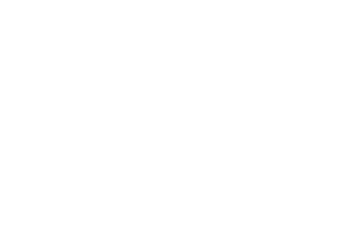

In [135]:
fig, ax = plt.subplots()
#ax.plot(0,1,'or')
#ax.plot([1,-1],[0,-2],'-k')

#dominio = np.linspace(0,3,100)
#imagem = np.sqrt(dominio)
#ax.plot(dominio,imagem,c='#de4f10',markevery=3,markersize=10)
#ax.plot(dominio,1-imagem,c='#de4f10',markevery=3,markersize=10)
ax.axis('off');

Realizamos a análise gráfica.

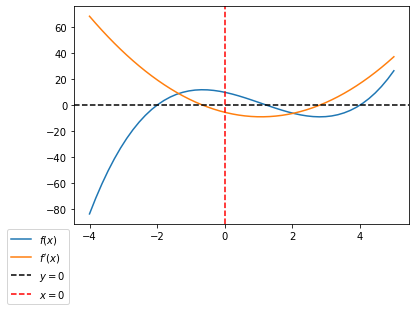

In [109]:
# analise gráfica 
x = np.linspace(-4,5)
plt.plot(x,f(x));
plt.plot(x,df(x));
plt.axhline(y=0,color='k',ls='--');
plt.axvline(x=0,color='r',ls='--');
plt.legend(['$f(x)$','$f\'(x)$','$y=0$','$x=0$'],
           loc='upper right',
           ncol=1,
           bbox_to_anchor = (0,0));

$f(x)$

Vamos realizar um estudo de diferentes estimativas iniciais e ver o que acontece.

##### Estimativa inicial: $x_0 = -1$

In [111]:
# resolução com newton 
x0 = -1.
x = newton(f,x0) # raiz 
print('Raiz: x = %f' % x)

Raiz: x = -2.000000


##### Estimativa inicial: $x_0 = 0$

In [113]:
# resolução com newton 
x0 = 0.
x = newton(f,x0,df) # raiz 
print('Raiz: x = %f' % x)

Raiz: x = 1.230000


##### Estimativa inicial: $x_0 = 3$

In [114]:
# resolução com newton 
x0 = 3.
x = newton(f,x0,df) # raiz 
print('Raiz: x = %f' % x)

Raiz: x = 4.000000


### Problema 2

Determine a menor raiz não nula positiva de $\cosh(x) \cos(x) - 1 = 0$ dentro do intervalo $(4,5)$.

#### Resolução:

Primeiramente, vamos escrever a função `f(x)`.

In [8]:
# função
f = lambda x: np.cosh(x)*np.cos(x) - 1 

Para computar a primeira derivada, vamos utilizar computação simbólica. Veja no início deste notebook que inserimos a instrução

```python
import sympy as sy
```

a qual nos permitirá utilizar objetos do módulo `sympy`.

Em primeiro lugar, devemos estabelecer uma variável simbólica `xs`.

In [9]:
xs = sy.Symbol('x')

Em seguida, devemos utilizar as funções `cosh` e `cos` **simbólicas** para derivar `f`. Elas serão **chamadas de dentro do módulo sympy**.

Escrevemos a expressão simbólica para a derivada.

In [10]:
d = sy.diff(sy.cosh(xs)*sy.cos(xs) - 1)
d

-sin(x)*cosh(x) + cos(x)*sinh(x)

Note que `d` é um objeto do módulo `sympy`

In [11]:
type(d)

sympy.core.add.Add

Podemos agora aproveitar a expressão de `d` para criar nossa derivada. Se imprimirmos `d`, teremos:

In [12]:
print(d)

-sin(x)*cosh(x) + cos(x)*sinh(x)


Porém, precisamos indicar que as funções serão objetos numpy. Logo, adicionamos `np`, de modo que:

In [13]:
df = lambda x: - np.sin(x)*np.cosh(x) + np.cos(x)*np.sinh(x)

Agora, realizamos a análise gráfica. 

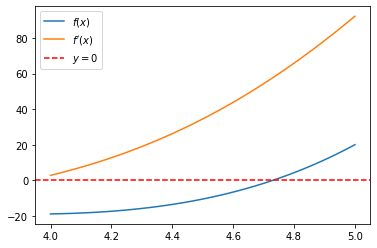

In [14]:
# analise gráfica 
x = np.linspace(4,5)
plt.plot(x,f(x));
plt.plot(x,df(x));
plt.axhline(y=0,color='r',ls='--');
plt.legend(['$f(x)$','$f\'(x)$','$y=0$']);

Agora, vamos resolver optando pela estimativa inicial $x_0 = 4.9$.

In [15]:
# resolução com newton 
x0 = 4.9
x = newton(f,x0,df) # raiz 
print('Raiz: x = %f' % x)

Raiz: x = 4.730041


## _Homework_ 

1. Reproduza os Problemas de 3 a 8 da _Code Session 1_ resolvendo com o método `newton`.
2. Para os casos possíveis, determine a derivada. Caso contrário, utilize como método da Secante. 
3. Pesquise sobre o método de Halley e aplique-o aos problemas usando também a função `newton`, mas avaliando-a também com a segunda derivada. 